In [1]:
# !pip3 install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

%config InlineBackend.figure_format = 'svg'

## Overview

In this notebook we'll test different models of machine learning on the classical [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Models to test:
* logistic regression
* k-nearest neigbors
* decision tree
* random forest
* gradient boosting

### Download MNIST dataset

In [2]:
X, Y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

In [3]:
X.shape, Y.shape

((70000, 784), (70000,))

### Scale to range [0,1] and convert labels to numbers

In [4]:
X = X.astype(float).values / 255
Y = Y.astype(int).values

In [5]:
X.dtype, Y.dtype

(dtype('float64'), dtype('int64'))

### Visualize random samples

In [6]:
def plot_digits(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = str(y_true[indices[i]])
        else:
            title = f"y={y_true[indices[i]]}, ŷ={y_pred[indices[i]]}"
        plt.title(title, size=20)
    plt.show()

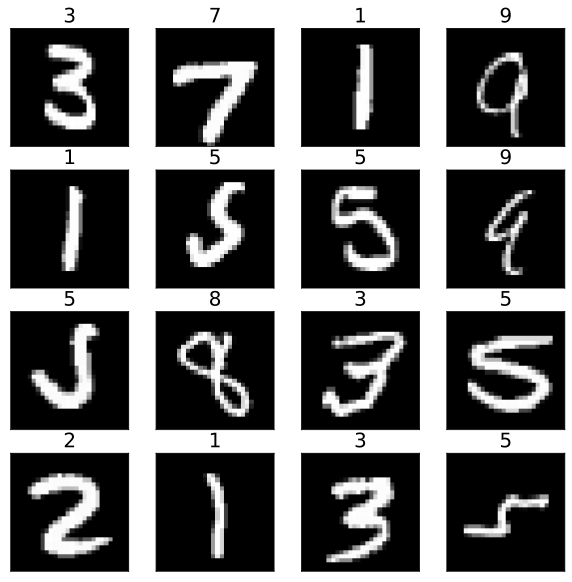

In [7]:
plot_digits(X, Y, random_state=12)

### Split the dataset into train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=10000, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [9]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 983, 1152,  967, 1034,  906,  937,  961, 1055,  969, 1036]))

## Logistic regression

### Binary classification

* Class labels: $Y = \{-1, 1\}$
* Training set: $\{(\boldsymbol x_i, y_i)\}_{i=1}^n$, $\boldsymbol x_i\in\mathbb R^d$, $y_i\in Y$
* Predictions: $a(\boldsymbol x) = \mathrm{sign}(\boldsymbol w^T \boldsymbol x)$, $\boldsymbol w\in\mathbb R^d$  are learnable parameters (weights)
* Loss function: $\mathcal L(\boldsymbol w) = \sum\limits_{i=1}^n \log\big(1 + \exp(-\boldsymbol w^T\boldsymbol x_iy_i) \big) + C \|\boldsymbol w\|^2 \to \min\limits_{\boldsymbol w}$
* $C \|\boldsymbol w\|^2$ is the regularization term

### Multiclass classificaton

* $Y$ is a finite set, e.g. $Y=\{1, 2, \ldots, K\}$
* Training set: $\{(\boldsymbol x_i, y_i)\}_{i=1}^n$, $\boldsymbol x_i\in\mathbb R^d$, $y_i\in Y$
* Predictions: $a(\boldsymbol x) = \arg\max\limits_{y}\boldsymbol w_y^T \boldsymbol x$
* Now we have a vector of weights $\boldsymbol w_y \in \mathbb R^d$ for each class $y\in Y$, $Kd$ learnable parameters in total
* Objective: $\mathcal L(\boldsymbol w) = \sum\limits_{i=1}^n \underbrace{\frac{\exp(\boldsymbol w_{y_i}^T \boldsymbol x_i)}{\sum\limits_{z \in Y}\exp(\boldsymbol w_{z}^T \boldsymbol x_i)}}_{\mathrm{SoftMax}} - C \sum\limits_{y\in Y}\|\boldsymbol w_y\|^2 \to \max\limits_{\boldsymbol w_{y_1}, \ldots, \boldsymbol w_{y_K}}$
* $\mathrm{SoftMax}(\boldsymbol t)$ converts a vector of real numbers $\boldsymbol t$ into discrete probability distribution
* In this case $\boldsymbol t = (\boldsymbol w_{y_1}^T\boldsymbol x, \ldots, \boldsymbol w_{y_K}^T\boldsymbol x)$, $\mathrm{SoftMax}(\boldsymbol t) = (p_1,\ldots, p_K)$, $p_k > 0$, $\sum\limits_{k=1}^K p_k = 1$

### Fit LR on train dataset

In [10]:
%%time
LR = LogisticRegression(max_iter=100)
LR.fit(X_train, y_train)

CPU times: user 54.4 s, sys: 2.63 s, total: 57 s
Wall time: 44.3 s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Make predictions

In [11]:
%%time
y_hat = LR.predict(X_test)
y_hat

CPU times: user 65.8 ms, sys: 66.3 ms, total: 132 ms
Wall time: 174 ms


array([8, 4, 5, ..., 3, 3, 3])

### Calculate accuracy and confustion matrix

In [12]:
accuracy_score(y_test, y_hat)

0.92

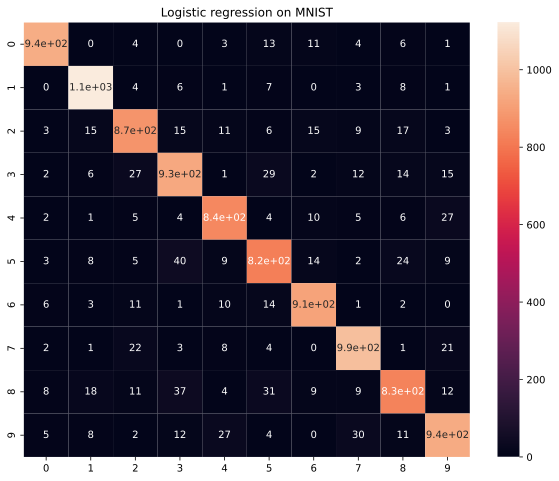

In [13]:
plt.figure(figsize=(10, 8))
plt.title("Logistic regression on MNIST")
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True);

### Visualize with true and predicted labels

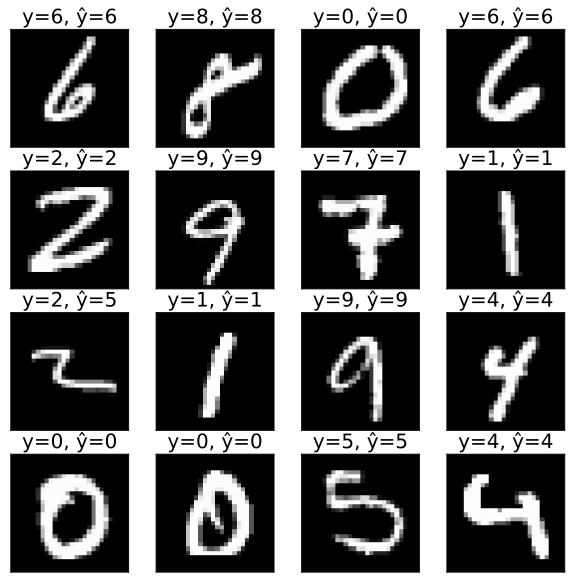

In [14]:
plot_digits(X_test, y_test, y_hat, random_state=125)

### Can we do better then 92%?

In [84]:
for C in np.logspace(-5, 3, num=9, base=4):
    LR = LogisticRegression(C=C, max_iter=10000)
    LR.fit(X_train, y_train)
    y_hat = LR.predict(X_test)
    print(f"C={C}, accuracy={accuracy_score(y_test, y_hat)}")

C=0.0009765625, accuracy=0.8932
C=0.00390625, accuracy=0.9088
C=0.015625, accuracy=0.9171
C=0.0625, accuracy=0.921
C=0.25, accuracy=0.9202
C=1.0, accuracy=0.9207
C=4.0, accuracy=0.9204
C=16.0, accuracy=0.9188
C=64.0, accuracy=0.9176


## KNN

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/03/knn3.png" style="width: 500px">

Given the training dataset $\{(\boldsymbol x_i, y_i)\}_{i=1}^n$, how to classify a new object $\boldsymbol x$?

* Sort distances $\rho (\boldsymbol x_i, \boldsymbol x)$ in increasing order:
$$
    \rho (\boldsymbol x_{(1)}, \boldsymbol x) \leqslant \rho (\boldsymbol x_{(2)}, \boldsymbol x) \leqslant \ldots \leqslant \rho (\boldsymbol x_{(n)}, \boldsymbol x) 
$$
* So $\boldsymbol x_{(i)}$ is the $i$-th neighbor of the object $\boldsymbol x$
* Let $y_{(i)}$ be the label of $\boldsymbol x_{(i)}$
* Now the $k$-nearest neighbor looks at $k$ nearest neighbors to $\boldsymbol x$ and assigns the most common label among these neigbors:
$$
    a_k(\boldsymbol x) = \arg\max_{y\in Y} \sum\limits_{i=1}^k [y = y_{(i)}]
$$
* Note that $a_1(\boldsymbol x) = y_{(1)}$.

How to calculate distance $\rho (\boldsymbol x, \boldsymbol y)$ of vectors $\boldsymbol x, \boldsymbol y \in\mathbb R^d$?

* Euclidean distance: $\rho_2(\boldsymbol x, \boldsymbol y) = \sqrt{\sum\limits_{k=1}^d (x_k - y_k)^2}$
* Manhattan distance: $\rho_1(\boldsymbol x, \boldsymbol y) = \sum\limits_{k=1}^d |x_k - y_k|$
* Minkowski distance: $\rho_p(\boldsymbol x, \boldsymbol y) = \Big(\sum\limits_{k=1}^d |x_k - y_k|^p \Big)^{\frac 1p}$, $p \geqslant 1$

<img src="unit_disks.jpg">

<img src="https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=jpeg">

### Train k-nearest neighbours classifier

In [15]:
%%time
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

CPU times: user 71.4 ms, sys: 7.87 ms, total: 79.3 ms
Wall time: 89.1 ms


KNeighborsClassifier()

In [16]:
%%time
y_hat = KNN.predict(X_test)
y_hat

CPU times: user 1min, sys: 1.65 s, total: 1min 2s
Wall time: 36.8 s


array([8, 4, 8, ..., 3, 8, 3])

In [17]:
accuracy_score(y_test, y_hat)

0.9696

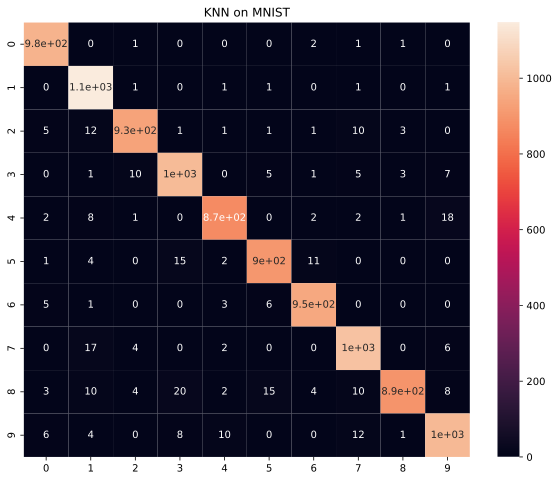

In [18]:
plt.figure(figsize=(10, 8))
plt.title("KNN on MNIST")
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True);

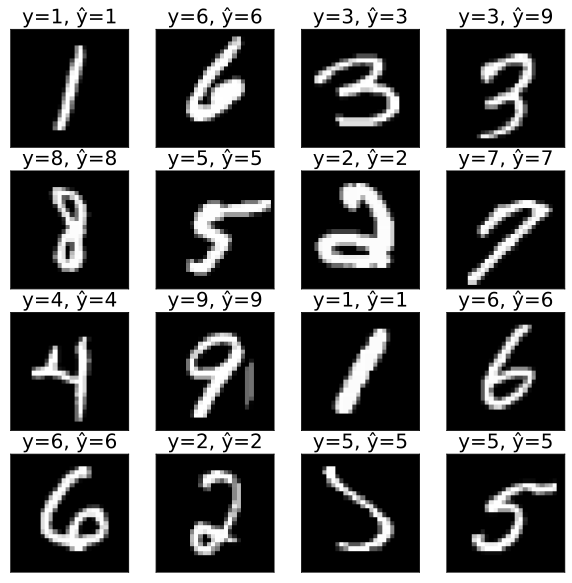

In [19]:
plot_digits(X_test, y_test, y_hat, random_state=126)

By default $k=5$. Can we do better by tuning this hyperparameter?

In [20]:
%%time
for k in range(1, 26):
    KNN = KNeighborsClassifier(k)
    KNN.fit(X_train, y_train)
    y_hat = KNN.predict(X_test)
    print(f"k={k}, accuracy={accuracy_score(y_test, y_hat)}")

k=1, accuracy=0.9722
k=2, accuracy=0.9621
k=3, accuracy=0.9711
k=4, accuracy=0.9689
k=5, accuracy=0.9696
k=6, accuracy=0.9679
k=7, accuracy=0.9687
k=8, accuracy=0.9667
k=9, accuracy=0.9669
k=10, accuracy=0.9655


KeyboardInterrupt: 

What about Manhattan distance instead of Eucledian?

In [90]:
# NB! Quite a time-consuming piece of code 
for k in range(1, 10):
    KNN = KNeighborsClassifier(k, p=1)
    KNN.fit(X_train, y_train)
    y_hat = KNN.predict(X_test)
    print(f"k={k}, accuracy={accuracy_score(y_test, y_hat)}")

k=1, accuracy=0.9642
k=2, accuracy=0.9539
k=3, accuracy=0.9646
k=4, accuracy=0.9615
k=5, accuracy=0.9641
k=6, accuracy=0.96
k=7, accuracy=0.9616
k=8, accuracy=0.9602
k=9, accuracy=0.9595


## Decision tree

<img src="https://regenerativetoday.com/wp-content/uploads/2022/04/dt.png">

In [21]:
%%time
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

CPU times: user 26.1 s, sys: 832 ms, total: 26.9 s
Wall time: 37.9 s


DecisionTreeClassifier()

In [22]:
%%time
y_hat = DT.predict(X_test)
y_hat

CPU times: user 30.1 ms, sys: 20.9 ms, total: 51 ms
Wall time: 76.6 ms


array([8, 8, 6, ..., 3, 8, 3])

In [23]:
accuracy_score(y_test, y_hat)

0.8704

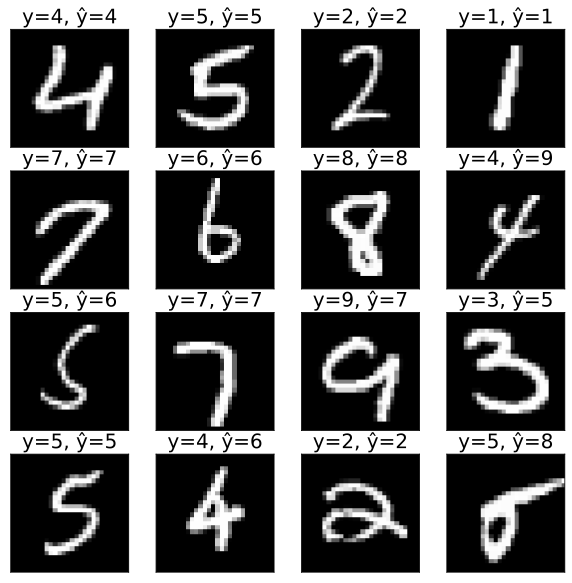

In [24]:
plot_digits(X_test, y_test, y_hat, random_state=129)

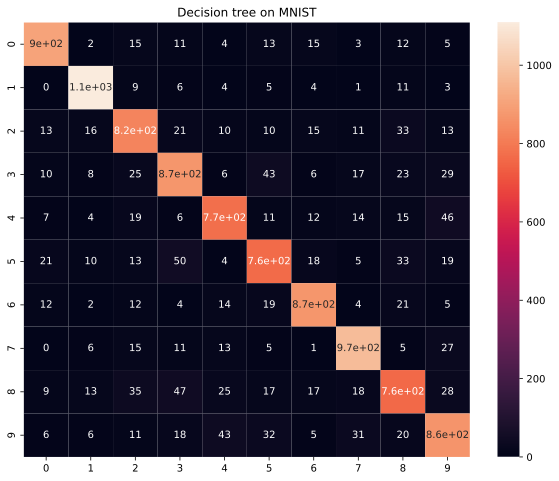

In [25]:
plt.figure(figsize=(10, 8))
plt.title("Decision tree on MNIST")
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True);

Let's study the influence of `max_depth` parameter

In [26]:
%%time
for depth in range(1, 31):
    DT = DecisionTreeClassifier(max_depth=depth)
    DT.fit(X_train, y_train)
    y_hat = DT.predict(X_test)
    print(f"depth={depth}, accuracy={accuracy_score(y_test, y_hat)}")

depth=1, accuracy=0.2042
depth=2, accuracy=0.3391
depth=3, accuracy=0.4441
depth=4, accuracy=0.5544
depth=5, accuracy=0.6557
depth=6, accuracy=0.7297
depth=7, accuracy=0.7745
depth=8, accuracy=0.8043
depth=9, accuracy=0.8388
depth=10, accuracy=0.8558
depth=11, accuracy=0.8656
depth=12, accuracy=0.8736
depth=13, accuracy=0.8743
depth=14, accuracy=0.8749
depth=15, accuracy=0.8745
depth=16, accuracy=0.878
depth=17, accuracy=0.8744
depth=18, accuracy=0.8763
depth=19, accuracy=0.8722
depth=20, accuracy=0.8743
depth=21, accuracy=0.8753
depth=22, accuracy=0.8733
depth=23, accuracy=0.875
depth=24, accuracy=0.8762
depth=25, accuracy=0.8739
depth=26, accuracy=0.8738
depth=27, accuracy=0.8722
depth=28, accuracy=0.8732
depth=29, accuracy=0.8717
depth=30, accuracy=0.874
CPU times: user 6min 17s, sys: 4.19 s, total: 6min 21s
Wall time: 6min 27s


## Random forest

<img src="https://serokell.io/files/vz/vz1f8191.Ensemble-of-decision-trees.png" style="height: 500px">

Random forest uses bagging over decision trees. Important hyperparameters:
* `n_estimators`: number of decision trees in the forest
* `max_depth`: maximum depth of decision trees
* `max_features`: the number of features to consider when looking for the best split (by default equals $\sqrt d$ where $d$ is the number of features)

In [26]:
%%time
RF = RandomForestClassifier(max_depth=20)
RF.fit(X_train, y_train)

CPU times: user 53.6 s, sys: 1.86 s, total: 55.5 s
Wall time: 1min 19s


RandomForestClassifier(max_depth=20)

In [27]:
%%time
y_hat = RF.predict(X_test)
y_hat

CPU times: user 520 ms, sys: 36.6 ms, total: 557 ms
Wall time: 779 ms


array([8, 4, 8, ..., 3, 8, 3])

In [28]:
accuracy_score(y_test, y_hat)

0.9655

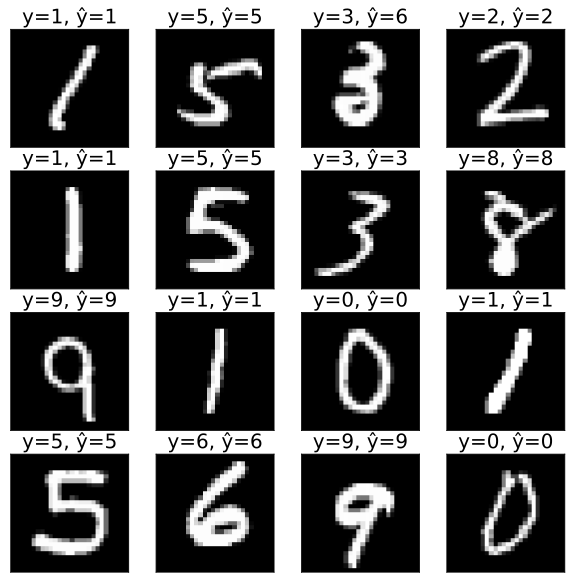

In [29]:
plot_digits(X_test, y_test, y_hat, random_state=130)

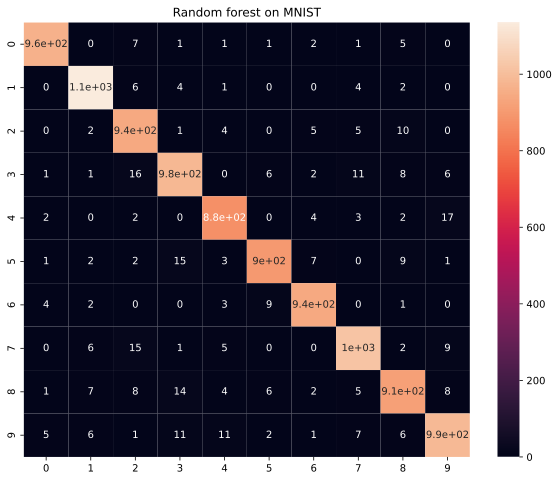

In [30]:
plt.figure(figsize=(10, 8))
plt.title("Random forest on MNIST")
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True);

In [113]:
# requires long computations
for n_estimators in [10, 50, 200, 1000]:
    for max_depth in range(5, 50, 5):
        RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        RF.fit(X_train, y_train)
        y_hat = RF.predict(X_test)
        print(f"n={n_estimators}, depth={max_depth}, accuracy={accuracy_score(y_test, y_hat)}")

n=10, depth=5, accuracy=0.7941
n=10, depth=10, accuracy=0.9265
n=10, depth=15, accuracy=0.9469
n=10, depth=20, accuracy=0.9462
n=10, depth=25, accuracy=0.9475
n=10, depth=30, accuracy=0.9447
n=10, depth=35, accuracy=0.9474
n=10, depth=40, accuracy=0.9443
n=10, depth=45, accuracy=0.9454
n=50, depth=5, accuracy=0.8494
n=50, depth=10, accuracy=0.9414
n=50, depth=15, accuracy=0.961
n=50, depth=20, accuracy=0.9638
n=50, depth=25, accuracy=0.964
n=50, depth=30, accuracy=0.9638
n=50, depth=35, accuracy=0.9652
n=50, depth=40, accuracy=0.9647
n=50, depth=45, accuracy=0.9643
n=200, depth=5, accuracy=0.8579
n=200, depth=10, accuracy=0.9446
n=200, depth=15, accuracy=0.9654
n=200, depth=20, accuracy=0.9661
n=200, depth=25, accuracy=0.968
n=200, depth=30, accuracy=0.9683
n=200, depth=35, accuracy=0.9674
n=200, depth=40, accuracy=0.9662
n=200, depth=45, accuracy=0.9689
n=1000, depth=5, accuracy=0.8636
n=1000, depth=10, accuracy=0.9465
n=1000, depth=15, accuracy=0.9648
n=1000, depth=20, accuracy=0.968

## Gradient boosting

<img src="https://vitalflux.com/wp-content/uploads/2022/12/gradient-boosting-algorithm-error-vs-iterations.png">

In [133]:
# ~2 hours of computations
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [134]:
y_hat = GB.predict(X_test)
y_hat

array([8, 4, 8, ..., 3, 8, 3])

In [135]:
accuracy_score(y_test, y_hat)

0.946

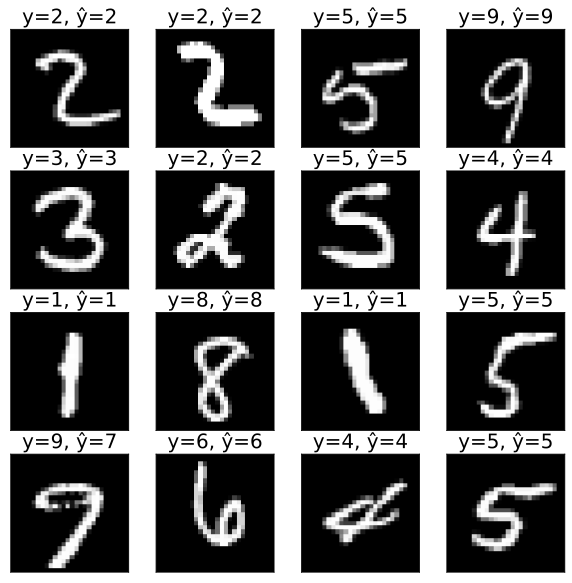

In [138]:
plot_digits(X_test, y_test, y_hat, random_state=133)

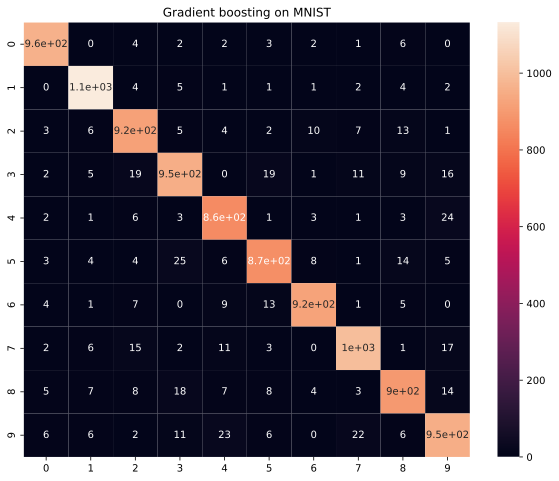

In [139]:
plt.figure(figsize=(10, 8))
plt.title("Gradient boosting on MNIST")
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True);

## Summary

The best accuracy scores on MNIST dataset:
* logistic regresion ~92%
* k-NN 96.96%
* desicison tree ~87.6%
* random forest ~96.9%
* gradient boosting ~94.6%

Almost 97% looks pretty well... or not? Neural nets are coming soon, and we'll see what accuracy they'd allow us to achieve. Stay tuned!